In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3)

In [2]:
#Load the Data for Single Linear Regression
df_simple = pd.read_csv('tvmarketing.csv')
df_simple.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
df_simple.shape

(200, 2)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

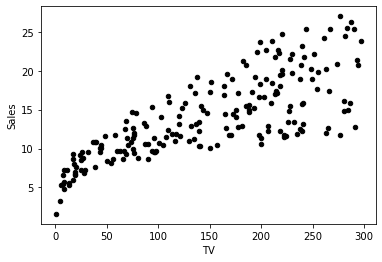

In [4]:
df_simple.plot(x='TV', y='Sales', kind='scatter', c='black')

In [5]:
df_simple_norm = (df_simple - df_simple.mean())/df_simple.std()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

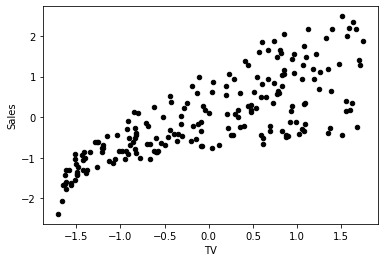

In [6]:
df_simple_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

In [7]:
X_norm = df_simple_norm['TV']
Y_norm = df_simple_norm['Sales']
X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1,len(Y_norm)))

In [8]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

In [9]:
(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print(n_x,n_y)

1 1


In [10]:
def initialize_parameters(n_x,n_y):
    
    W = np.random.randn(n_y,n_x) * 0.01
    b = np.zeros((n_y,1))
    
    parameters = {'W': W, 'b': b}
    return parameters

In [11]:
parameters = initialize_parameters(1,1)
parameters

{'W': array([[0.01788628]]), 'b': array([[0.]])}

In [12]:
def forward_propegation(X,paramaters):
    W = paramaters['W']
    b = paramaters['b']
    Z = np.matmul(W,X) + b
    return Z

In [13]:
Y_predict = forward_propegation(X_norm,parameters)
print(Y_predict[0,:5])

[ 0.01730363 -0.021363   -0.0270505   0.00092865  0.00703281]


In [14]:
def cost_function(Y,Y_predict):
    m = Y.shape[1]
    cost =  np.sum((Y-Y_predict)**2)/(2*m)
    return cost

In [15]:
cost_function(Y_norm,Y_predict)

0.48373802644758923

In [16]:
def back_propegation(Y,Y_predict,X):
    m = Y.shape[1]
    dZ= (Y_predict-Y)
    dW = 1/m * np.dot(dZ,X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {'dW':dW, 'db':db}
    return grads

In [17]:
grads = back_propegation(Y_norm,Y_predict,X_norm)
grads

{'dW': array([[-0.76051645]]), 'db': array([[5.10702591e-16]])}

In [18]:
def update_parameters(learning_rate,grads,parameters):
    W = parameters['W']
    b = parameters['b']
    
    dW = grads['dW']
    db = grads['db']
    
    W = W - (learning_rate * dW)
    b = b - (learning_rate * db)
    
    parameters ={'W':W, 'b':b}
    return parameters

In [19]:
parameters = update_parameters(0.01,grads, parameters)
parameters

{'W': array([[0.02549145]]), 'b': array([[-5.10702591e-18]])}

In [22]:
def linear_regression(n_x,n_y,X,Y,learning_rate, number_of_iteration):
    parameters = initialize_parameters(n_x,n_y)
    
    for i in range(number_of_iteration):
        Y_predict = forward_propegation(X,parameters)
        print('cost in iteration #', i+1, '=', cost_function(Y, Y_predict))
        grads = back_propegation(Y,Y_predict,X)
        parameters = update_parameters(0.01,grads, parameters)

In [23]:
linear_regression(1,1,X_norm,Y_norm,1.2, 100)

cost in iteration # 1 = 0.49674941062931793
cost in iteration # 2 = 0.4907366942123535
cost in iteration # 3 = 0.48484303557812963
cost in iteration # 4 = 0.47906607726378786
cost in iteration # 5 = 0.47340350848658597
cost in iteration # 6 = 0.467853064219585
cost in iteration # 7 = 0.46241252428563884
cost in iteration # 8 = 0.45707971246932344
cost in iteration # 9 = 0.45185249564645086
cost in iteration # 10 = 0.4467287829308199
cost in iteration # 11 = 0.4417065248378618
cost in iteration # 12 = 0.4367837124648469
cost in iteration # 13 = 0.4319583766873228
cost in iteration # 14 = 0.42722858737146624
cost in iteration # 15 = 0.42259245260202855
cost in iteration # 16 = 0.41804811792557006
cost in iteration # 17 = 0.4135937656086793
cost in iteration # 18 = 0.4092276139108795
cost in iteration # 19 = 0.4049479163719323
cost in iteration # 20 = 0.4007529611132547
cost in iteration # 21 = 0.3966410701531667
cost in iteration # 22 = 0.3926105987356997
cost in iteration # 23 = 0.38865